In [13]:
from traineval.train_eval import TrainerEvaluator

In [14]:
from traineval.utils.convert_arguments import get_environment_arguments

# The arguments you want the agent to use
district_args = ["hour",
                 "month",
                 "carbon_intensity",
                 "electricity_pricing"]

building_args = ["non_shiftable_load",
                 "solar_generation",
                 "electrical_storage_soc",
                 "net_electricity_consumption"]

environment_arguments = get_environment_arguments(district_args, building_args)

In [15]:
# Variables
num_epochs = 200
save_freq = 1

In [16]:
# Run training (COMMENT OUT mpi_fork IN train.py METHOD run_ppo)
trainer_evaluator = TrainerEvaluator(epochs=num_epochs)
# trainer = trainer_evaluator.setup_trainer(environment_arguments)
# trainer_evaluator.run_trainer(trainer)

C:\Users\philip\Storage\Epoch\citylearn-2022-starter-kit\venv\lib\site-packages\gym\envs\registration.py:517: UserWarning: WARN: Overriding environment Epoch-Citylearn-v1
  logger.warn(f"Overriding environment {spec.id}")


Logging data to C:\Users\philip\Storage\Epoch\citylearn-2022-starter-kit\traineval\training\spinningup\data\ppo\ppo_s0\progress.txt
Saving config:

{
    "ac_kwargs":	{
        "hidden_sizes":	[
            64,
            64
        ]
    },
    "actor_critic":	"MLPActorCritic",
    "clip_ratio":	0.2,
    "env_fn":	"<function TrainModel.run_ppo.<locals>.<lambda> at 0x000002244A464940>",
    "epochs":	200,
    "exp_name":	"ppo",
    "gamma":	0.99,
    "lam":	0.97,
    "logger":	{
        "<traineval.training.spinningup.utils.logx.EpochLogger object at 0x000002244A36FB80>":	{
            "epoch_dict":	{},
            "exp_name":	"ppo",
            "first_row":	true,
            "log_current_row":	{},
            "log_headers":	[],
            "output_dir":	"C:\\Users\\philip\\Storage\\Epoch\\citylearn-2022-starter-kit\\traineval\\training\\spinningup\\data\\ppo\\ppo_s0",
            "output_file":	{
                "<_io.TextIOWrapper name='C:\\\\Users\\\\philip\\\\Storage\\\\Epoch\\\\c

C:\Users\philip\Storage\Epoch\citylearn-2022-starter-kit\venv\lib\site-packages\gym\spaces\box.py:112: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")
C:\Users\philip\Storage\Epoch\citylearn-2022-starter-kit\venv\lib\site-packages\gym\utils\passive_env_checker.py:97: UserWarning: WARN: We recommend you to use a symmetric and normalized Box action space (range=[-1, 1]) https://stable-baselines3.readthedocs.io/en/master/guide/rl_tips.html
  logger.warn(
C:\Users\philip\Storage\Epoch\citylearn-2022-starter-kit\venv\lib\site-packages\gym\utils\passive_env_checker.py:216: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed a `seed` instead of using `Env.seed` for resetting the environment random number generator. 
  logger.warn(
C:\Users\philip\Storage\Epoch\citylearn-2022-starter-kit\venv\lib\site-packages\gym\utils\passive_env_checker.py:228: UserWarning: WARN: Futu


Number of parameters: 	 pi: 6090, 	 v: 5825

Saving model
C:\Users\philip\Storage\Epoch\citylearn-2022-starter-kit\traineval\training\spinningup\data\ppo\ppo_s0\pyt_save\model0.pt
---------------------------------------
|             Epoch |               0 |
|      AverageEpRet |       -2.98e+03 |
|          StdEpRet |              25 |
|          MaxEpRet |       -2.94e+03 |
|          MinEpRet |       -3.01e+03 |
|             EpLen |           1e+03 |
|      AverageVVals |          0.0925 |
|          StdVVals |          0.0449 |
|          MaxVVals |           0.234 |
|          MinVVals |         -0.0382 |
| TotalEnvInteracts |           4e+03 |
|            LossPi |        4.07e-07 |
|             LossV |        7.78e+04 |
|       DeltaLossPi |         -0.0194 |
|        DeltaLossV |       -5.28e+03 |
|           Entropy |           0.919 |
|                KL |          0.0123 |
|          ClipFrac |           0.159 |
|          StopIter |              79 |
|              Time

In [ ]:
model_type = "ppo"
model_seed = 0
eval_freq = 1

def get_evaluation_data(num_epochs, eval_freq):

    averaged_scores = []
    times_elapsed = []
    for epoch in range(0, num_epochs, eval_freq):
        print(epoch)

        # TODO: make this run in parallel
        averaged_score, agent_time = trainer_evaluator.run_evaluation(environment_arguments=environment_arguments,
                                                      model_type=model_type, model_seed=model_seed, model_iteration=str(epoch))
        averaged_scores.append(averaged_score)
        times_elapsed.append(agent_time)
        if epoch + eval_freq >= num_epochs and epoch != num_epochs - 1:
            averaged_score, agent_time = trainer_evaluator.run_evaluation(environment_arguments=environment_arguments,
                                                      model_type=model_type, model_seed=model_seed, model_iteration=str(epoch))
            averaged_scores.append(averaged_score)
            times_elapsed.append(agent_time)
    return averaged_scores, times_elapsed

averaged_scores, times_elapsed = get_evaluation_data(num_epochs, eval_freq)

0
Starting local evaluation
Num Steps: 1000, Num episodes: 0
Num Steps: 2000, Num episodes: 0
Num Steps: 3000, Num episodes: 0
Num Steps: 4000, Num episodes: 0
Num Steps: 5000, Num episodes: 0
Num Steps: 6000, Num episodes: 0
Num Steps: 7000, Num episodes: 0
Num Steps: 8000, Num episodes: 0
Episode complete: 1 | Latest episode metrics: {'price_cost': 1.2787661707008597, 'emmision_cost': 1.784370254839832, 'grid_cost': 2.3864394013642376}
=========================Completed=========================
Average Price Cost: 1.2787661707008597
Average Emmision Cost: 1.784370254839832
Average Grid Cost: 2.3864394013642376
Average cost: 1.8165252756349766
1
Starting local evaluation
Num Steps: 1000, Num episodes: 0
Num Steps: 2000, Num episodes: 0
Num Steps: 3000, Num episodes: 0
Num Steps: 4000, Num episodes: 0
Num Steps: 5000, Num episodes: 0
Num Steps: 6000, Num episodes: 0
Num Steps: 7000, Num episodes: 0
Num Steps: 8000, Num episodes: 0
Episode complete: 1 | Latest episode metrics: {'price_c

In [19]:
print("averages", averaged_scores)
print("times", times_elapsed)

averages [1.8165252756349766, 1.777372324301868, 1.7687886628492455, 1.7467947481197061, 1.729452511745155, 1.734674975078633, 1.7416279126970784, 1.7671807877590837, 1.7334087342523363, 1.7068555523228575, 1.682384606634077, 1.6427697759896673, 1.6284592388246644, 1.614940042138036, 1.5826459801319672, 1.642872137805382, 1.5954306904648732, 1.575503286969029, 1.5839313528745411, 1.587404903241455, 1.60535910721124, 1.5967700024547777, 1.5768121795582095, 1.566818037898395, 1.5403624446027824, 1.5232206474674868, 1.5066849008268524, 1.5087462513563885, 1.4694933632850085, 1.4795070364063092, 1.494518579735735, 1.5107691236647114, 1.4868717839400762, 1.5066026663593, 1.506501759048027, 1.4811918721986264, 1.4671689335544613, 1.449098615118496, 1.4197662376000404, 1.412462628088998, 1.4035676011127671, 1.4007117186630234, 1.4320300770566414, 1.464780515933004, 1.4682332562331333, 1.4652299433345644, 1.4430153882237124, 1.416965851741411, 1.3819628780647006, 1.3969105417615173, 1.41371549

In [26]:
import numpy as np
import pandas as pd

df_costs_times = pd.DataFrame({"averages":averaged_scores, "times": np.cumsum(times_elapsed)})

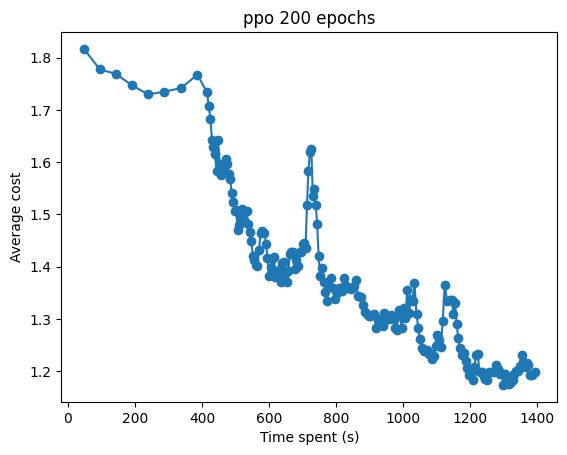

In [30]:
from matplotlib import pyplot as plt

fig,ax=plt.subplots()
ax.plot(df_costs_times.times, df_costs_times.averages, marker="o")
ax.set_xlabel("Time spent (s)")
ax.set_ylabel("Average cost")
ax.set_title(f"{model_type} {num_epochs} epochs")
# ax.plot(gapminder_us.year, gapminder_us["gdpPercap"], marker="o")
plt.show()